# TF-IDF processing evaluation

This notebook runs train.py for different config.yaml parameters such as model type and text preprocessing. The results of each run is saved in the 'runs' folder.

In [8]:
import pickle
import json
import yaml
import pandas as pd
import os

from os import listdir
from os.path import isfile, join

import plotly.graph_objects as go

In [2]:
os.getcwd()

'/Users/elmi/Projects/CloudWine/train/notebooks'

In [3]:
os.chdir('../')

In [4]:
os.getcwd()

'/Users/elmi/Projects/CloudWine/train'

In [5]:
# Functions to manipulate the config yaml
def reset_config():
    config = {
      "model": "tfidf",
      "args": {
        "data_path": "./data/raw/sample_10000.csv",
        "lowercase": False,
        "remove_punctuation": False,
        "remove_stopwords": False,
        "lemmatize": False,
        "save_model": False,
        "model_dir": "./models/",
        "save_validation": False,
        "validation_dir": "./runs/"
      }
    }
    return config

def set_lowercase(config):
    config['args']['lowercase'] = True
    return config
    
def set_punctuation(config):
    config['args']['remove_punctuation'] = True
    return config

def set_stopwords(config):
    config['args']['remove_stopwords'] = True
    return config

def set_lemmatize(config):
    config['args']['lemmatize'] = True
    return config

In [7]:
# Run training for all models with/without processing
print('\n Converting to lowercase')
config = reset_config()
config = set_lowercase(config)
with open('./config.yaml', "w") as ff:
    yaml.dump(config, ff, default_flow_style=False)
!python3 train.py -y './config.yaml'

print('\n Removing punctuation')
config = reset_config()
config = set_punctuation(config)
with open('./config.yaml', "w") as ff:
    yaml.dump(config, ff, default_flow_style=False)
!python3 train.py -y './config.yaml'

print('\n Removing stopwords')
config = reset_config()
config = set_stopwords(config)
with open('./config.yaml', "w") as ff:
    yaml.dump(config, ff, default_flow_style=False)
!python3 train.py -y './config.yaml'

print('\n Lemmatization')
config = reset_config()
config = set_lemmatize(config)
with open('./config.yaml', "w") as ff:
    yaml.dump(config, ff, default_flow_style=False)
!python3 train.py -y './config.yaml'


 Converting to lowercase
[nltk_data] Downloading package stopwords to /Users/elmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/elmi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2020-06-17 11:31:32,591 gensim.corpora.dictionary INFO     adding document #0 to Dictionary(0 unique tokens: [])
2020-06-17 11:31:32,592 gensim.corpora.dictionary INFO     built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2020-06-17 11:31:33,128 transformers.file_utils INFO     PyTorch version 1.5.0 available.
2020-06-17 11:31:33,255 root         INFO     {'data_path': './data/raw/sample_10000.csv', 'lemmatize': False, 'lowercase': True, 'model_dir': './models/', 'remove_punctuation': False, 'remove_stopwords': False, 'save_model': False, 'save_validation': False, 'validation_dir': './runs/'}
2020-06-17 11:31:33,255 root         

In [10]:
# Read output pickle files and store in dictionary
graph = {'preprocess':['lowercase', 'remove_punctuation', 'remove_stopwords', 'lemmatization'], 
         'similarity':[0.38998098552654425, 0.3890917860442903, 0.3267235042780249, 0.39049721365847245]}

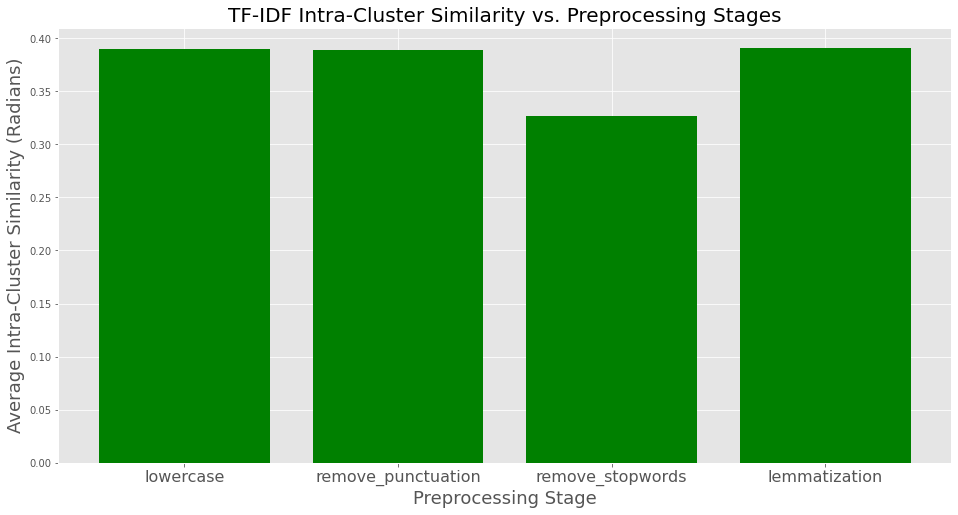

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['lowercase', 'remove_punctuation', 'remove_stopwords', 'lemmatization']
energy = [0.38998098552654425, 0.3890917860442903, 0.3267235042780249, 0.39049721365847245]

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(16, 8))

plt.bar(x_pos, energy, color='green')
plt.xlabel("Preprocessing Stage", fontsize=18)

plt.ylabel("Average Intra-Cluster Similarity (Radians)", fontsize=18)
plt.title("TF-IDF Intra-Cluster Similarity vs. Preprocessing Stages", fontsize=20)

plt.xticks(x_pos, x, size=16)

plt.show()